In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
credit_data = pd.read_csv("credit.csv")

In [3]:
credit = pd.DataFrame(credit_data)

In [4]:
#Data Cleaning
len(credit)

1000

In [5]:
len(credit.columns)

17

In [6]:
credit.shape

(1000, 17)

In [7]:
credit.size

17000

In [8]:
credit.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [9]:
credit.tail()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
995,unknown,12,good,furniture/appliances,1736,< 100 DM,4 - 7 years,3,4,31,none,own,1,unskilled,1,no,no
996,< 0 DM,30,good,car,3857,< 100 DM,1 - 4 years,4,4,40,none,own,1,management,1,yes,no
997,unknown,12,good,furniture/appliances,804,< 100 DM,> 7 years,4,4,38,none,own,1,skilled,1,no,no
998,< 0 DM,45,good,furniture/appliances,1845,< 100 DM,1 - 4 years,4,4,23,none,other,1,skilled,1,yes,yes
999,1 - 200 DM,45,critical,car,4576,100 - 500 DM,unemployed,3,4,27,none,own,1,skilled,1,no,no


In [10]:
credit.dtypes

checking_balance        object
months_loan_duration     int64
credit_history          object
purpose                 object
amount                   int64
savings_balance         object
employment_duration     object
percent_of_income        int64
years_at_residence       int64
age                      int64
other_credit            object
housing                 object
existing_loans_count     int64
job                     object
dependents               int64
phone                   object
default                 object
dtype: object

In [11]:
credit.isnull().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
percent_of_income       0
years_at_residence      0
age                     0
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0
phone                   0
default                 0
dtype: int64

In [12]:
credit.nunique()

checking_balance          4
months_loan_duration     33
credit_history            5
purpose                   6
amount                  921
savings_balance           5
employment_duration       5
percent_of_income         4
years_at_residence        4
age                      53
other_credit              3
housing                   3
existing_loans_count      4
job                       4
dependents                2
phone                     2
default                   2
dtype: int64

In [13]:
credit['checking_balance'].unique()

array(['< 0 DM', '1 - 200 DM', 'unknown', '> 200 DM'], dtype=object)

In [14]:
import statistics

In [15]:
statistics.mode(credit['checking_balance'])

'unknown'

In [16]:
#drop checking balance
credit = credit.drop(['checking_balance'],axis=1)

In [17]:
statistics.mode(credit['savings_balance'])

'< 100 DM'

In [18]:
credit['savings_balance'] = credit['savings_balance'].replace(to_replace='unknown',value= np.NaN ,regex=True)

In [19]:
#Imputation by Most frequent values (mode):
credit["savings_balance"] = credit["savings_balance"].replace(np.NaN, statistics.mode(credit["savings_balance"]))

In [20]:
credit['purpose'].unique()

array(['furniture/appliances', 'education', 'car', 'business',
       'renovations', 'car0'], dtype=object)

In [21]:
credit['purpose'] = credit['purpose'].replace(to_replace='car0',value='car',regex=True)

In [22]:
credit['purpose'].unique()

array(['furniture/appliances', 'education', 'car', 'business',
       'renovations'], dtype=object)

In [23]:
credit.describe()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


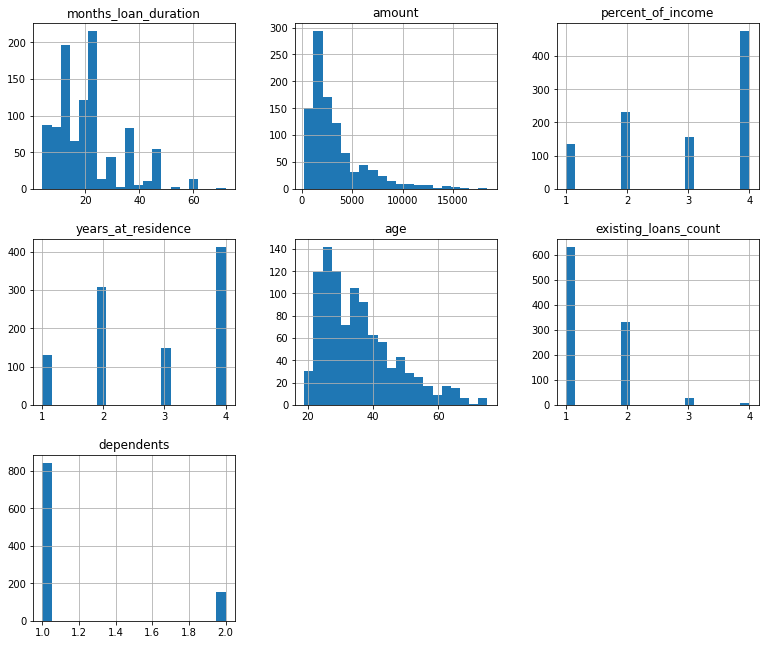

In [24]:
credit.hist(figsize=(13,11),bins=20)
plt.show()

<AxesSubplot:xlabel='amount'>

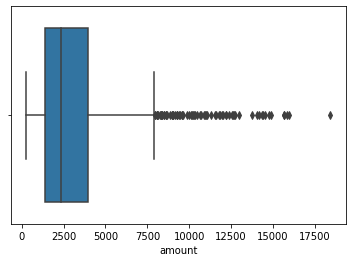

In [25]:
sns.boxplot(data = credit, x = 'amount')

In [26]:
credit[credit['amount'] > 17500]

,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
915,48,perfect,car,18424,< 100 DM,1 - 4 years,1,2,32,bank,own,1,management,1,yes,yes


In [27]:
credit.drop(credit.index[credit['amount'] > 17500], inplace = True)

<AxesSubplot:xlabel='age'>

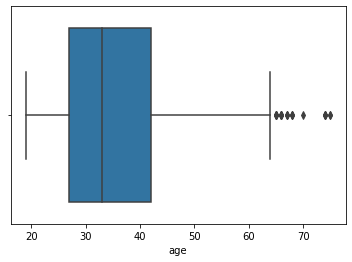

In [28]:
sns.boxplot(data = credit, x = 'age')

<AxesSubplot:xlabel='months_loan_duration'>

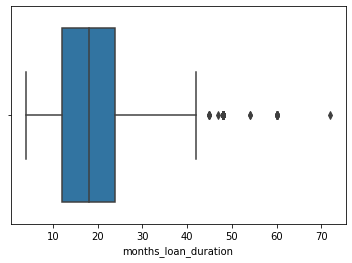

In [29]:
sns.boxplot(data = credit, x = 'months_loan_duration')

In [30]:
credit[credit['months_loan_duration'] > 50]

,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
29,60,poor,business,6836,< 100 DM,> 7 years,3,4,63,none,own,2,skilled,1,yes,yes
78,54,perfect,car,9436,< 100 DM,1 - 4 years,2,2,39,none,own,1,unskilled,2,no,no
95,54,perfect,business,15945,< 100 DM,< 1 year,3,4,58,none,rent,1,skilled,1,yes,yes
134,60,good,furniture/appliances,10144,100 - 500 DM,4 - 7 years,2,4,21,none,own,1,skilled,1,yes,no
255,60,poor,furniture/appliances,7418,< 100 DM,1 - 4 years,1,1,27,none,own,1,unskilled,1,no,no
332,60,good,car,7408,100 - 500 DM,< 1 year,4,2,24,none,own,1,management,1,no,yes
373,60,critical,car,13756,< 100 DM,> 7 years,2,4,63,bank,other,1,management,1,yes,no
374,60,very good,car,14782,100 - 500 DM,> 7 years,3,4,60,bank,other,2,management,1,yes,yes
616,60,poor,furniture/appliances,9157,< 100 DM,1 - 4 years,2,2,27,none,other,1,management,1,no,no
637,60,poor,furniture/appliances,15653,< 100 DM,4 - 7 years,2,4,21,none,own,2,skilled,1,yes,no


In [31]:
credit.drop(credit.index[credit['months_loan_duration'] > 50], inplace = True)

Text(0.5, 1.0, 'People Loan Defaults')

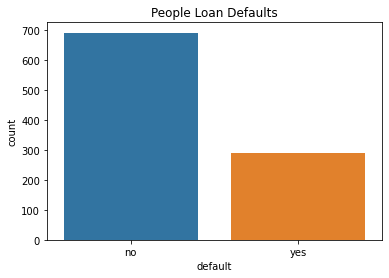

In [32]:
sns.countplot('default',data = credit )
plt.title("People Loan Defaults")

Text(0.5, 1.0, 'People defaulting by employment duration')

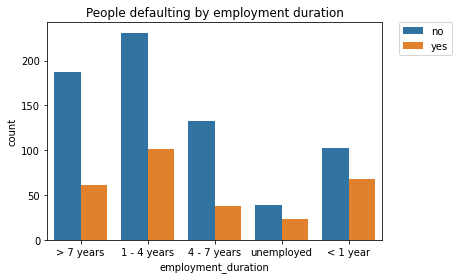

In [33]:
sns.countplot('employment_duration',data = credit, hue ='default')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title("People defaulting by employment duration")

Text(0.5, 1.0, 'People defaulting by loan type')

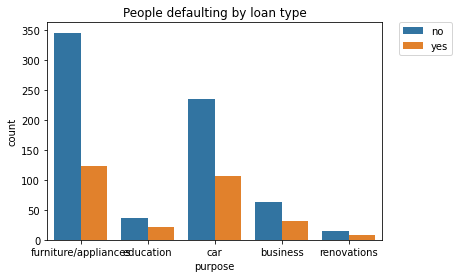

In [34]:
sns.countplot('purpose',data = credit, hue ='default')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title("People defaulting by loan type")

Text(0.5, 1.0, 'People defaulting by loan type')

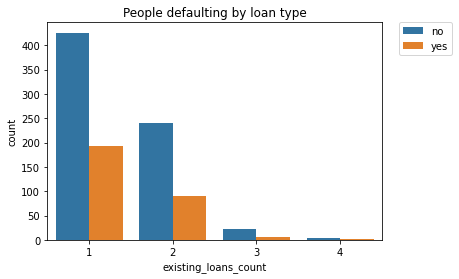

In [35]:
sns.countplot('existing_loans_count',data = credit, hue ='default')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title("People defaulting by loan type")

Text(0.5, 1.0, 'People defaulting by age')

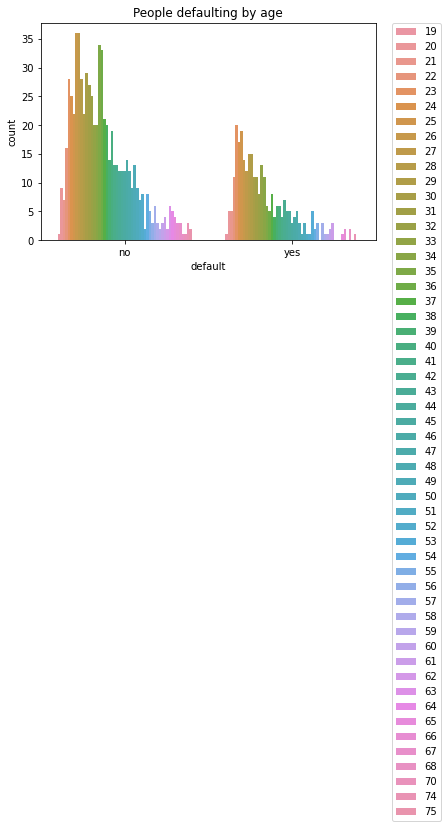

In [36]:
sns.countplot('default',data = credit, hue ='age')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title("People defaulting by age")

Text(0.5, 1.0, 'People defaulting by housing')

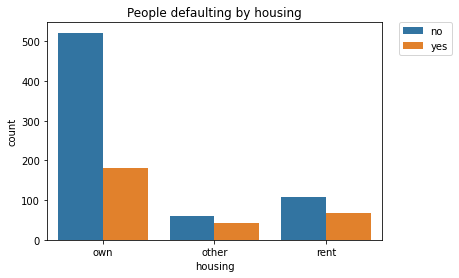

In [37]:
sns.countplot('housing',data = credit, hue ='default')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title("People defaulting by housing")

Text(0.5, 1.0, 'People defaulting by Savings Balance')

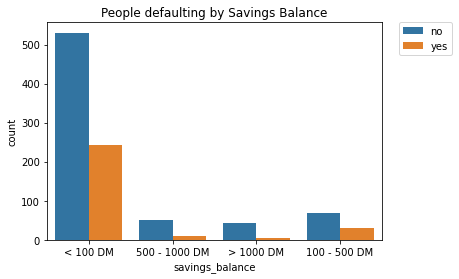

In [99]:
sns.countplot('savings_balance',data = credit, hue ='default')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title("People defaulting by Savings Balance")

Text(0.5, 1.0, 'People defaulting by Credit History')

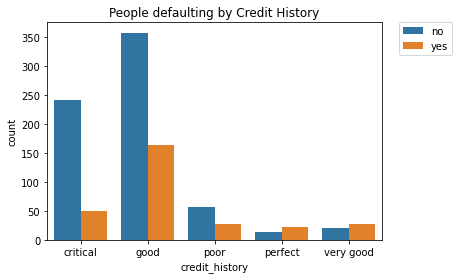

In [38]:
sns.countplot('credit_history',data = credit, hue ='default')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title("People defaulting by Credit History")

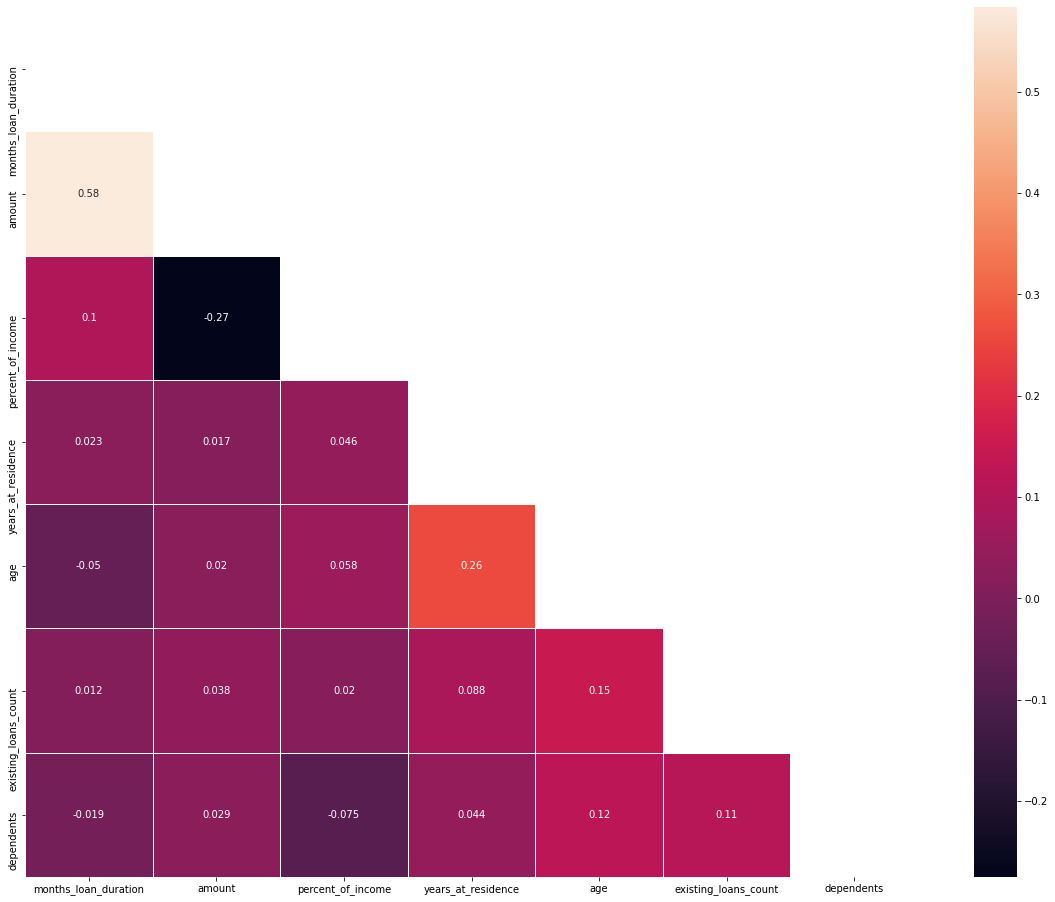

In [39]:
credit_corr =credit.corr()

mask = np.triu(np.ones_like(credit_corr, dtype=bool))

fig, ax = plt.subplots(figsize=(20,16))
sns.heatmap(credit_corr, mask=mask, annot=True, linewidths=.8, ax=ax)
plt.show()


In [40]:
credit_df = credit.copy()

In [41]:
credit_df = pd.get_dummies(credit_df ,columns=['credit_history','purpose','savings_balance','employment_duration','other_credit','housing','job','phone','default'])

In [42]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 983 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   months_loan_duration             983 non-null    int64
 1   amount                           983 non-null    int64
 2   percent_of_income                983 non-null    int64
 3   years_at_residence               983 non-null    int64
 4   age                              983 non-null    int64
 5   existing_loans_count             983 non-null    int64
 6   dependents                       983 non-null    int64
 7   credit_history_critical          983 non-null    uint8
 8   credit_history_good              983 non-null    uint8
 9   credit_history_perfect           983 non-null    uint8
 10  credit_history_poor              983 non-null    uint8
 11  credit_history_very good         983 non-null    uint8
 12  purpose_business                 983 non-null    u

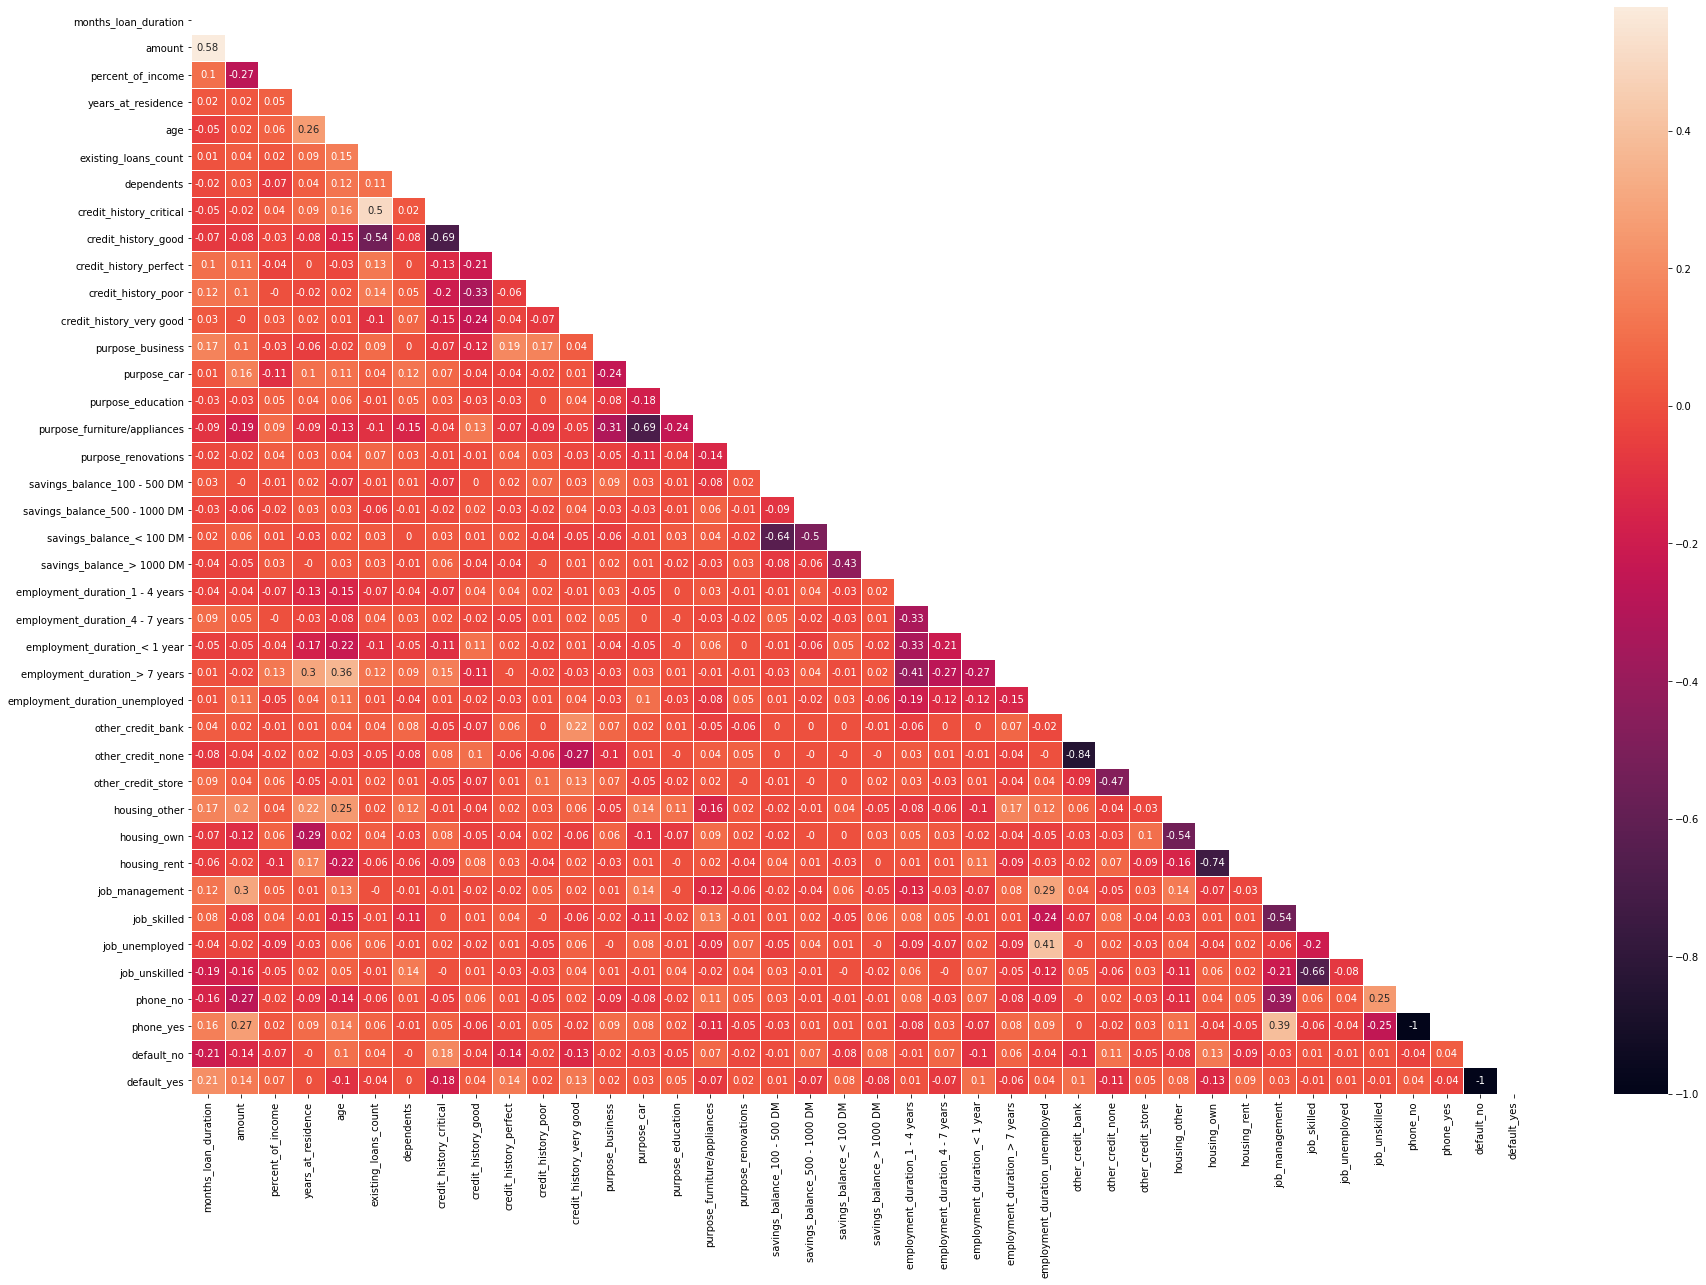

In [43]:
creditdf_corr =credit_df.corr().round(2)

mask = np.triu(np.ones_like(creditdf_corr, dtype=bool))

fig, ax = plt.subplots(figsize=(30,20))
sns.heatmap(creditdf_corr, mask=mask, annot=True, linewidths=.8, ax=ax)
plt.show()


In [44]:
credit_log = credit.copy()

In [45]:
sum(credit_log.duplicated())

0

In [46]:
credit_history = pd.get_dummies(credit_log['credit_history'],drop_first=True)

In [47]:
purpose = pd.get_dummies(credit_log['purpose'],drop_first=True)

In [48]:
savings_balance = pd.get_dummies(credit_log['savings_balance'],drop_first=True)

In [49]:
employment_duration = pd.get_dummies(credit_log['employment_duration'],drop_first=True)

In [50]:
other_credit = pd.get_dummies(credit_log['other_credit'],drop_first=True)

In [51]:
housing = pd.get_dummies(credit_log['housing'],drop_first=True)

In [52]:
job = pd.get_dummies(credit_log['job'],drop_first=True)

In [53]:
phone = pd.get_dummies(credit_log['phone'],drop_first=True)

In [54]:
default = pd.get_dummies(credit_log['default'],drop_first=True)

In [55]:
credit_log.drop(['default','phone','job','housing','other_credit','employment_duration','savings_balance','purpose','credit_history'],axis=1,inplace=True)

In [56]:
credit_log = pd.concat([credit_log,credit_history,employment_duration,savings_balance,
                       housing,default],axis=1)

In [57]:
credit_log.columns = [*credit_log.columns[:-1], 'default']


In [58]:
credit_log.head()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents,good,perfect,poor,...,4 - 7 years,< 1 year,> 7 years,unemployed,500 - 1000 DM,< 100 DM,> 1000 DM,own,rent,default
0,6,1169,4,4,67,2,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
1,48,5951,2,2,22,1,1,1,0,0,...,0,0,0,0,0,1,0,1,0,1
2,12,2096,2,3,49,1,2,0,0,0,...,1,0,0,0,0,1,0,1,0,0
3,42,7882,2,4,45,1,2,1,0,0,...,1,0,0,0,0,1,0,0,0,0
4,24,4870,3,4,53,2,2,0,0,1,...,0,0,0,0,0,1,0,0,0,1


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics

In [60]:
X_train, X_test, y_train, y_test = train_test_split(credit_log.drop('default',axis=1), 
                                                    credit_log['default'], test_size=0.30, 
                                                    random_state=101)

In [61]:
logmodel = LogisticRegression(max_iter=4000)


In [62]:
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=4000)

In [63]:
predictions = logmodel.predict(X_test)

In [64]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       215
           1       0.55      0.28      0.37        80

    accuracy                           0.74       295
   macro avg       0.66      0.60      0.60       295
weighted avg       0.71      0.74      0.71       295



In [65]:
cnf_matrix = metrics.confusion_matrix(y_test, predictions)
cnf_matrix

array([[197,  18],
       [ 58,  22]], dtype=int64)

<AxesSubplot:>

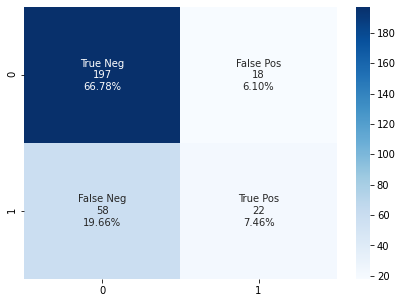

In [66]:
fig = plt.gcf()
fig.set_size_inches(7, 5)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cnf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cnf_matrix.flatten()/np.sum(cnf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues')

In [67]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test, predictions))

Accuracy: 0.7423728813559322
Precision: 0.55
Recall: 0.275


In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
credit_rand = credit_log.copy()

In [70]:
X_train_R, X_test_R, y_train_R, y_test_R = train_test_split(credit_rand.drop('default',axis=1), 
                                                    credit_rand['default'], test_size=0.30, 
                                                    random_state=101)

In [71]:
RandomForest = RandomForestClassifier(n_estimators = 15, criterion = 'entropy', random_state = 30)

In [72]:
RandomForest = RandomForest.fit(X_train_R, y_train_R)

In [73]:
Rand_Pred_Y = RandomForest.predict(X_test_R)

In [74]:
print("Accuracy:",metrics.accuracy_score(y_test_R, Rand_Pred_Y))
print("Precision:",metrics.precision_score(y_test_R, Rand_Pred_Y))
print("Recall:",metrics.recall_score(y_test_R, Rand_Pred_Y))

Accuracy: 0.7254237288135593
Precision: 0.49056603773584906
Recall: 0.325


In [75]:
print(classification_report(y_test_R, Rand_Pred_Y))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       215
           1       0.49      0.33      0.39        80

    accuracy                           0.73       295
   macro avg       0.63      0.60      0.61       295
weighted avg       0.70      0.73      0.71       295



In [76]:
Rand_cnf = metrics.confusion_matrix(y_test_R, Rand_Pred_Y)
Rand_cnf

array([[188,  27],
       [ 54,  26]], dtype=int64)

<AxesSubplot:>

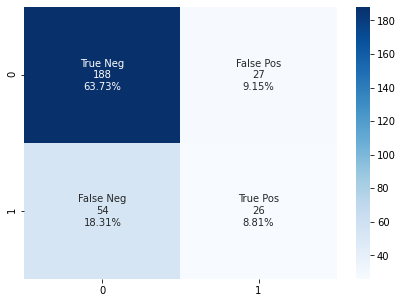

In [77]:
fig = plt.gcf()
fig.set_size_inches(7, 5)
group_names_ = ['True Neg','False Pos','False Neg','True Pos']
group_counts_ = ["{0:0.0f}".format(value) for value in
                Rand_cnf.flatten()]
group_percentages_ = ["{0:.2%}".format(value) for value in
                     Rand_cnf.flatten()/np.sum(Rand_cnf)]
labels_ = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names_,group_counts_,group_percentages_)]
labels_ = np.asarray(labels_).reshape(2,2)
sns.heatmap(Rand_cnf, annot=labels_, fmt='', cmap='Blues')

Text(0.5, 0, 'Feature Importance Random Forest')

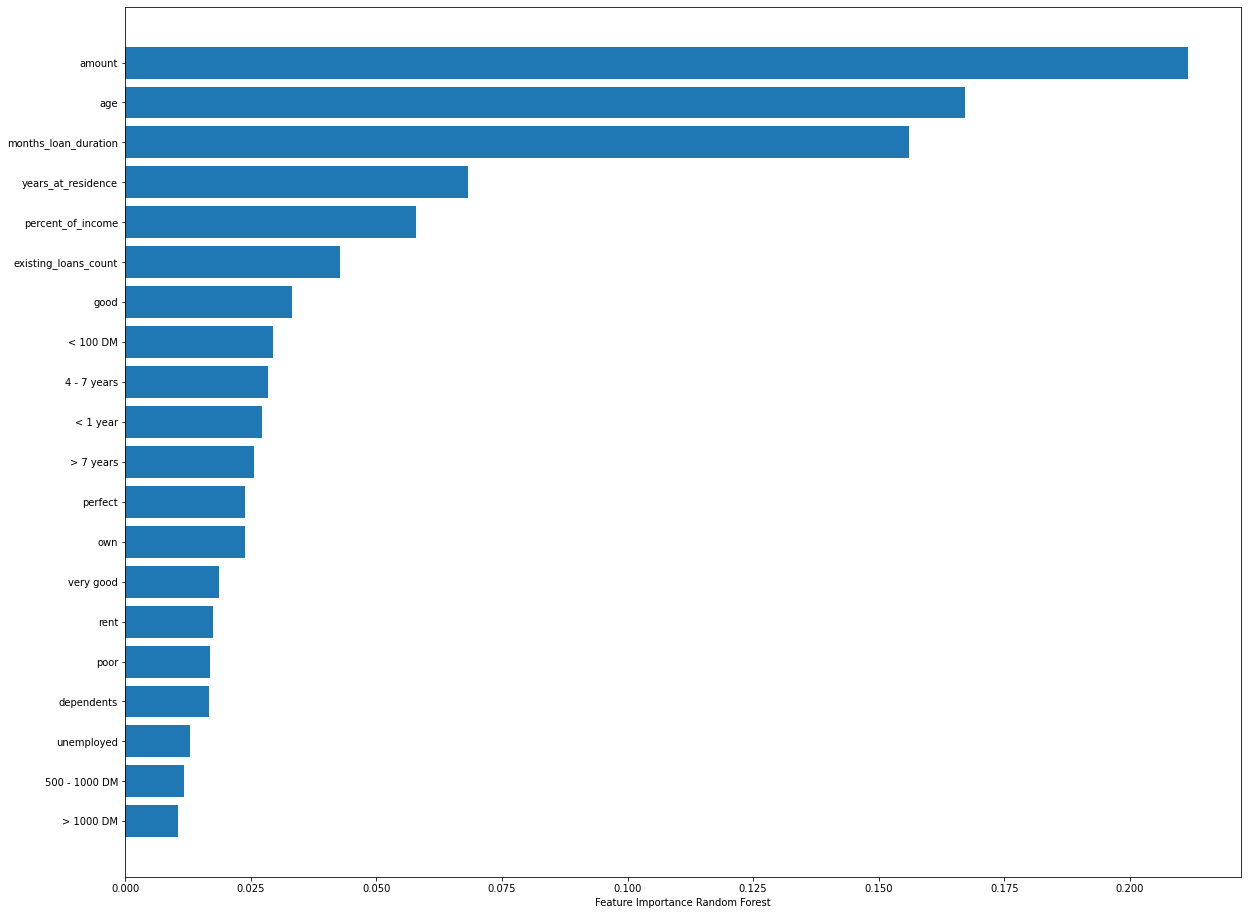

In [78]:
fig, ax = plt.subplots(figsize=(20,16))
sorted_idx = RandomForest.feature_importances_.argsort()
plt.barh(X_train_R.columns[sorted_idx], RandomForest.feature_importances_[sorted_idx])
plt.xlabel("Feature Importance Random Forest")

In [79]:
income = credit['amount'] / credit['percent_of_income'] * 100

In [80]:
income = income.astype(int)

In [81]:
income = pd.DataFrame(income)

In [82]:
income = income.rename(columns={0: 'income'})

In [83]:
years = credit["months_loan_duration"] / 12

In [84]:
years = pd.DataFrame(years)

In [85]:
years = years.rename(columns={'months_loan_duration': 'years_loan_duration'})

In [86]:
credit_log = pd.concat([credit_log,income,years],axis=1)

In [87]:
X_train_R.columns[sorted_idx]

Index(['> 1000 DM', '500 - 1000 DM', 'unemployed', 'dependents', 'poor',
       'rent', 'very good', 'own', 'perfect', '> 7 years', '< 1 year',
       '4 - 7 years', '< 100 DM', 'good', 'existing_loans_count',
       'percent_of_income', 'years_at_residence', 'months_loan_duration',
       'age', 'amount'],
      dtype='object')

In [88]:
credit_features = credit_log[['amount', 'age','months_loan_duration','years_at_residence','percent_of_income',
                             'default']].copy()

In [89]:
credit_features = pd.concat([credit_features,years,income],axis=1)

In [90]:

credit_features.head()

,amount,age,months_loan_duration,years_at_residence,percent_of_income,default,years_loan_duration,income
0,1169,67,6,4,4,0,0.5,29225
1,5951,22,48,2,2,1,4.0,297550
2,2096,49,12,3,2,0,1.0,104800
3,7882,45,42,4,2,0,3.5,394100
4,4870,53,24,4,3,1,2.0,162333


In [91]:
X_train_feat, X_test_feat, y_train_feat, y_test_feat = train_test_split(credit_features.drop('default',axis=1), 
                                                    credit_features['default'], test_size=0.30, 
                                                    random_state=101)

In [92]:
logmodel_feat = LogisticRegression()
    

In [93]:
logmodel_feat.fit(X_train_feat,y_train_feat)


LogisticRegression()

In [94]:
predictions_feat = logmodel_feat.predict(X_test_feat)

In [95]:
print(classification_report(y_test_feat,predictions_feat))

              precision    recall  f1-score   support

           0       0.73      0.98      0.84       215
           1       0.38      0.04      0.07        80

    accuracy                           0.72       295
   macro avg       0.55      0.51      0.45       295
weighted avg       0.63      0.72      0.63       295



In [96]:
cnf_matrix = metrics.confusion_matrix(y_test_feat, predictions_feat)
cnf_matrix

array([[210,   5],
       [ 77,   3]], dtype=int64)

<AxesSubplot:>

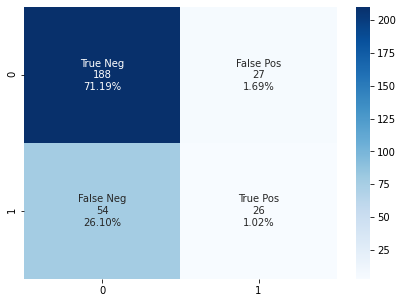

In [97]:
fig = plt.gcf()
fig.set_size_inches(7, 5)
group_names_ = ['True Neg','False Pos','False Neg','True Pos']
group_counts_ = ["{0:0.0f}".format(value) for value in
                Rand_cnf.flatten()]
group_percentages_ = ["{0:.2%}".format(value) for value in
                     cnf_matrix.flatten()/np.sum(cnf_matrix)]
labels_ = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names_,group_counts_,group_percentages_)]
labels_ = np.asarray(labels_).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels_, fmt='', cmap='Blues')